# **Final Project 1: Linear Regression**



1. Fayza Chairunnisa Permana (PYTN-KS18-09)
2. Febriansyah Permana (PYTN-KS18-06)
3. Fenti Febriani (PYTN-KS18-04)

## **1. Pengenalan**


*   Informasi dataset
Dataset didapatkan melalui link berikut:
https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

Dataset yang ini adalah dataset Uber and Lyft Dataset Boston yang berisikan data perjalanan taksi yang mencakup 57 kolom dan 693071 Baris di dalamnya

*   Latar Belakang

Dataset ini memiliki banyak NA dan outliers yang banyak, sehingga sangat cocok apabila ingin menggunakan model Regresi linear untuk melihat pola antara Variabel independen dan dependen

*   Objective
1. Memahami konsep linear regression
2. Mampu menyiapkan data yang digunakan pada model linear regression
3. Mampu mengimplementasikan linear regression untuk membuat prediksi

## **2. Import Pustaka yang akan digunakan**

In [ ]:
import pandas as pd
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

## **3. Data Loading**

In [ ]:
df = pd.read_csv('/content/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.00,0.73,5.28,5.28,1543514400,10.00,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.10,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,9.14,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.00,42.35,-71.06,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.00,0.00,0.74,2.34,2.87,1543672800,9.79,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.79,271.50,1543665331,1543698855,0.82,0.00,1543

In [ ]:
df.shape

(693071, 57)

dataset yang terdiri dari 693071 baris dan 57 kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.00,1544045709.76,689192.49,1543203646.00,1543443968.00,1543737478.00,1544827509.00,1545160511.00
hour,693071.00,11.62,6.95,0.00,6.00,12.00,18.00,23.00
day,693071.00,17.79,9.98,1.00,13.00,17.00,28.00,30.00
month,693071.00,11.59,0.49,11.00,11.00,12.00,12.00,12.00
price,637976.00,16.55,9.32,2.50,9.00,13.50,22.50,97.50
distance,693071.00,2.19,1.14,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071.00,1.01,0.09,1.00,1.00,1.00,1.00,3.00
latitude,693071.00,42.34,0.05,42.21,42.35,42.35,42.36,42.37
longitude,693071.00,-71.07,0.02,-71.11,-71.08,-71.06,-71.05,-71.03
temperature,693071.00,39.58,6.73,18.91,36.45,40.49,43.58,57.22


In [ ]:
# cek kolom dengan tipe data object/categorical
df.describe(include=object).T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


## **4. Data Cleaning**

**kolom-kolom yang tidak diperlukan akan dibuang, hal ini mengurangi eror ketika memprediksi**

In [ ]:
df = df.drop(columns=['id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime',
                'uvIndexTime', 'sunsetTime', 'sunriseTime', 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime',
                'temperatureHighTime', 'windGustTime', 'timestamp'])

In [ ]:
df.sample(5)

,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
70310,19,27,11,2018-11-27 19:18:25,Back Bay,Haymarket Square,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.32,1.00,42.37,-71.06,42.95,37.54,Mostly Cloudy,Light rain in the morning.,0.00,0.00,0.72,9.42,13.80,10.00,46.83,33.75,43.85,29.97,partly-cloudy-day,34.56,990.25,257,0.81,0,10.00,313.60,0.68,0.14,36.13,46.83,32.05,43.85
43159,17,28,11,2018-11-28 17:16:23,Beacon Hill,North End,Lyft,lyft_plus,Lyft XL,10.50,1.56,1.00,42.36,-71.07,40.77,35.14,Overcast,Mostly cloudy throughout the day.,0.00,0.00,0.63,8.76,14.90,10.00,42.57,37.37,36.55,31.91,cloudy,29.17,991.33,303,1.00,1,10.00,352.40,0.72,0.00,33.70,42.57,29.94,36.55
332545,19,13,12,2018-12-13 19:40:10,Fenway,North Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,3.07,1.00,42.36,-71.05,32.85,32.85,Mostly Cloudy,Partly cloudy throughout the day.,0.00,0.00,0.56,2.65,3.83,9.96,33.83,27.27,32.85,24.61,partly-cloudy-day,18.66,1033.65,76,0.64,0,9.96,330.80,0.21,0.00,18.29,33.83,13.79,32.85
336223,18,27,11,2018-11-27 18:45:22,Fenway,Financial District,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,13.50,4.41,1.00,42.34,-71.09,41.82,36.10,Overcast,Light rain in the morning.,0.00,0.00,0.73,9.51,15.95,9.99,46.35,33.59,43.38,29.98,cloudy,33.78,990.20,261,0.92,1,9.99,316.30,0.68,0.14,35.76,46.35,31.80,43.38
676138,19,13,12,2018-12-13 19:20:10,Beacon Hill,Haymarket Square,Lyft,lyft_line,Shared,5.00,1.37,1.00,42.36,-71.05,32.85,32.85,Mostly Cloudy,Partly cloudy throughout the day.,0.00,0.00,0.56,2.65,3.83,9.96,33.83,27.27,32.85,24.61,partly-cloudy-day,18.66,1033.65,76,0.64,0,9.96,330.80,0.21,0.00,18.29,33.83,13.79,32.85


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.sample()

,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
678143,9,29,11,2018-11-29 09:48:03,Northeastern University,North Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,3.22,1.00,42.21,-71.03,37.79,30.62,Mostly Cloudy,Partly cloudy throughout the day.,0.00,0.00,0.67,10.63,11.40,10.00,45.03,28.90,38.53,26.20,partly-cloudy-night,27.63,1001.97,306,0.53,0,10.00,341.90,0.75,0.00,34.67,45.03,30.30,38.53


**Menampilkan sebaran nilai unik pada kolom icon dan nilai yang sering muncul dalam dataframe**

In [ ]:
df['icon'].value_counts()

 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: icon, dtype: int64

In [ ]:
# cek jumlah nilai unik
df['long_summary'].nunique()

11

In [ ]:
df.groupby(['short_summary', 'long_summary'])['hour'].count()

short_summary       long_summary                                        
 Clear               Foggy in the morning.                                   3744
                     Light rain in the morning and overnight.                3744
                     Light rain in the morning.                              3900
                     Mostly cloudy throughout the day.                      34632
                     Partly cloudy throughout the day.                      37362
                     Rain throughout the day.                                3744
 Drizzle             Light rain in the morning.                              5616
                     Rain until morning, starting again in the evening.      1680
 Foggy               Foggy in the morning.                                   5616
                     Rain in the morning and afternoon.                        84
                     Rain until morning, starting again in the evening.      3360
 Light Rain          Ligh

In [ ]:
lst_remove_temp = df.filter(regex='temperature|apparent', axis=1).columns.to_list()
lst_remove_temp.remove('temperature')
lst_remove_temp

['apparentTemperature',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [ ]:
df = df.drop(columns=['long_summary', 'icon', 'latitude', 'longitude'])
df = df.drop(columns='datetime')
df = df.drop(columns=lst_remove_temp)

### **Missing Value**







In [ ]:
print(df.isnull().sum())

hour                      0
day                       0
month                     0
source                    0
destination               0
cab_type                  0
product_id                0
name                      0
price                 55095
distance                  0
surge_multiplier          0
temperature               0
short_summary             0
precipIntensity           0
precipProbability         0
humidity                  0
windSpeed                 0
windGust                  0
visibility                0
dewPoint                  0
pressure                  0
windBearing               0
cloudCover                0
uvIndex                   0
visibility.1              0
ozone                     0
moonPhase                 0
precipIntensityMax        0
dtype: int64


Pengecekan missing value diatas terdapat pada kolom price sebanyak 55095 yang dimana kolom price tersebut adalah kolom target dan jumlah data yang cukup banyak, maka dari itu perlu adanya missing value data yang akan dibuang.

In [ ]:
df = df.dropna().reset_index()

In [ ]:
df.isnull().sum()

index                 0
hour                  0
day                   0
month                 0
source                0
destination           0
cab_type              0
product_id            0
name                  0
price                 0
distance              0
surge_multiplier      0
temperature           0
short_summary         0
precipIntensity       0
precipProbability     0
humidity              0
windSpeed             0
windGust              0
visibility            0
dewPoint              0
pressure              0
windBearing           0
cloudCover            0
uvIndex               0
visibility.1          0
ozone                 0
moonPhase             0
precipIntensityMax    0
dtype: int64

In [ ]:
df.shape

(637976, 29)

In [ ]:
# cek duplikasi data
df.duplicated().any()

False

## **5. Explorasi Data**

### **Variability**

In [ ]:
df['month'].value_counts()

12    374205
11    263771
Name: month, dtype: int64

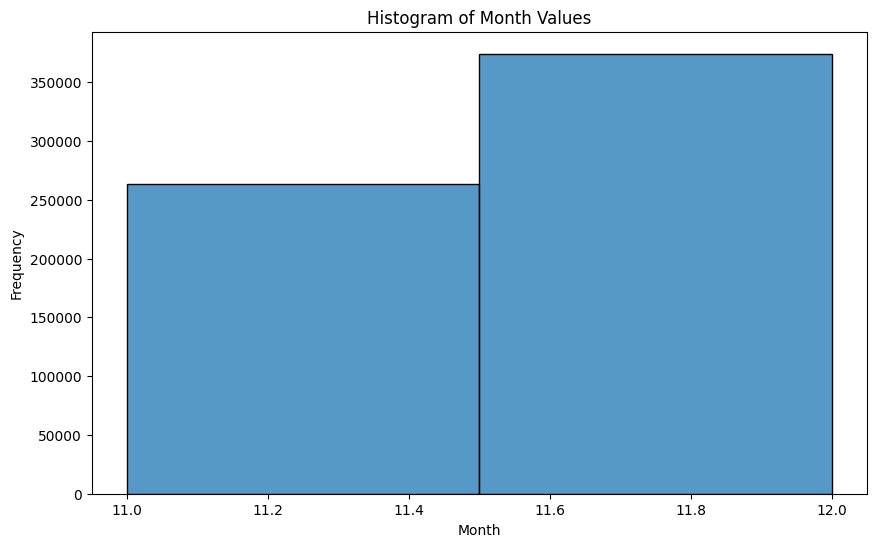

In [ ]:
month_counts = df['month'].value_counts()

# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['month'], bins=len(month_counts), kde=False)
plt.title('Histogram of Month Values')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

Data yang direkam hanya dibulan november dan desember, banyaknya data yang mendominasi yaitu dibulan desember.

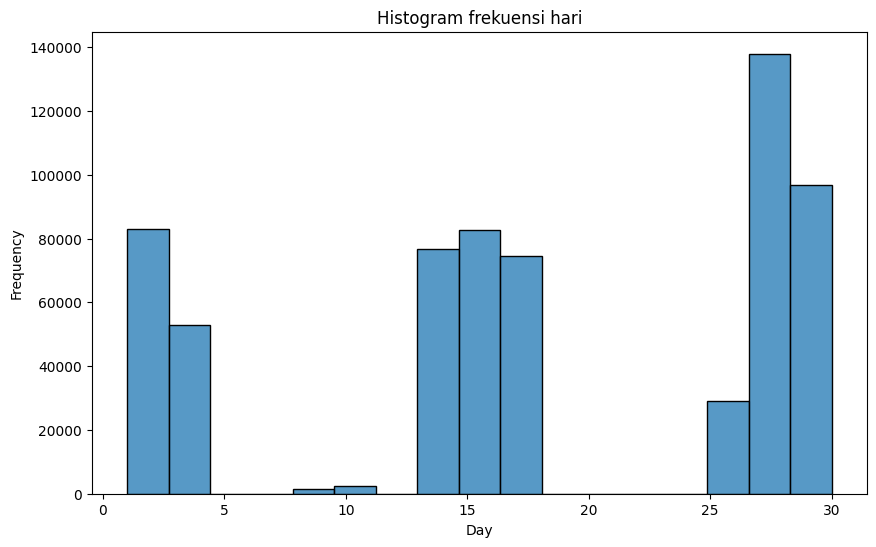

In [ ]:
day_counts = df['day'].value_counts()

# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['day'], bins=len(day_counts), kde=False)
plt.title('Histogram frekuensi hari')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

Terlihat bawah frekuensi kolom 'day' tidak konsisten yang mana di sekitar tanggal 10 memiliki data yang sangat rendah dibandingkan di tanggal 25-30 yaitu memiliki data cukup tinggi.

In [ ]:
df['hour'].value_counts()

0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: hour, dtype: int64

In [ ]:
top_hours = df['hour'].value_counts().head(5)
print(top_hours)

0     29872
23    29355
17    28075
12    28017
13    27977
Name: hour, dtype: int64


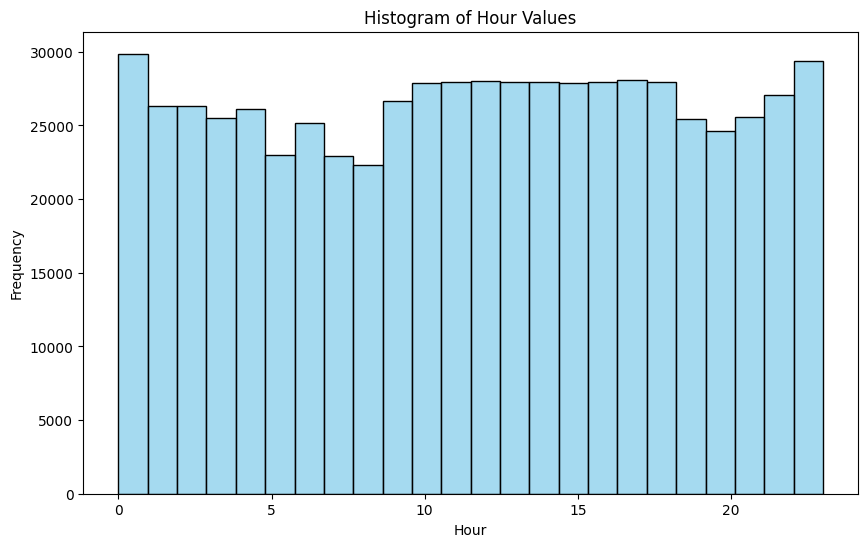

In [ ]:
hour_counts = df['hour'].value_counts()

# Membuat histogram dengan Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, kde=False, color='skyblue')
plt.title('Histogram of Hour Values')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()



Terlihat bahwa data order taxi hampir 24 jam terekam

### **Central Tendencies**

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
numeric_columns

['index',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'temperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'moonPhase',
 'precipIntensityMax']

In [ ]:
NumCol  = ['index', 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'temperature']
central_tendency = pd.DataFrame({'Kolom':NumCol,
                                 'Mean':[df[i].mean()  for i in NumCol],
                                'Median':[df[i].median()  for i in NumCol],
                                'Modus': [df[i].mode()[0]  for i in NumCol],
                                'skewness': [skew(df[i]) for i in NumCol]})
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Kolom,Mean,Median,Modus,skewness,skew
0,index,346446.05,346400.00,0.00,0.00,Right skewed
1,hour,11.62,12.00,0.00,-0.05,Left skewed
2,day,17.80,17.00,27.00,-0.38,Right skewed
3,month,11.59,12.00,12.00,-0.35,Left skewed
4,price,16.55,13.50,7.00,1.05,Right skewed
5,distance,2.19,2.16,2.66,0.82,Right skewed
6,surge_multiplier,1.02,1.00,1.00,7.97,Right skewed
7,temperature,39.58,40.49,37.92,-0.61,Left skewed


## **6. Data Preprocessing**

### **Outlier**

<Axes: >

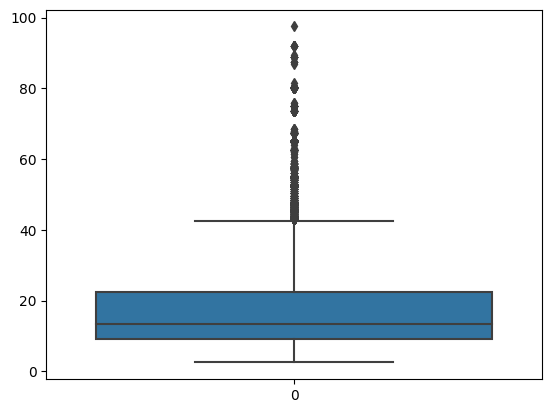

In [ ]:
sns.boxplot(df['price'])

Terdapat adanya potensi outlier dalam distribusi price, ourlier dapat dilihat sebagai titik-titik diluar batas dalam diagram kotak. Yang selanjutnya akan dibandingkan apakah menghilangkan outlier dapat berpengaruh terhadap model

In [ ]:
max_threshold = df['price'].quantile(0.99)
max_threshold

42.5

Terdapat bahwa 99% dari nilai dalam kolom 'price' berada di bawah 42.5, dan nilai ini dapat digunakan sebagai ambang batas untuk mengidentifikasi potensi outlier atau nilai yang ekstrim dalam data price

In [ ]:
df[df['price'] > max_threshold].shape

(5589, 29)

Terdapat bahwa 5589 baris yang memiliki nilai harga di atas ambang atas (outliers), dan data frame tersebut masih memiliki 28 kolom. Jumlah baris ini memberikan informasi tentang seberapa banyak data outlier yang ada dalam kolom price.

In [ ]:
df_no_outlier = df[df['price'] < max_threshold]
df_no_outlier.shape

(629994, 29)

Setelah melakukan penghapusan outlier, dataframe baru memiliki 629994 baris dan 28 kolom.

<Axes: >

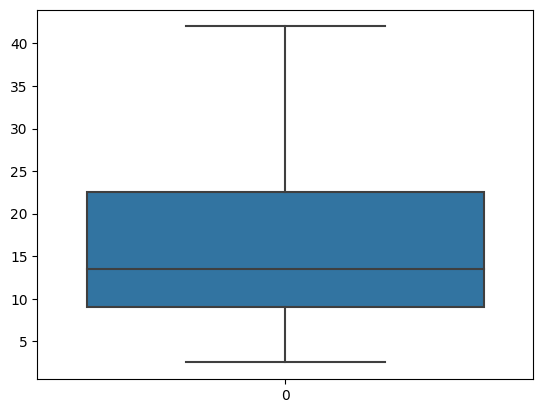

In [ ]:
sns.boxplot(df_no_outlier['price'])

### **Encoding Data**

Data variabel kategori diubah ke bentuk numerik untuk dapat melakukan proses pemodelan. Jadi proses encoding ini akan dilakukan untuk mengubah nilai category menjadi numerik.

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
object_columns

['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary']

In [ ]:
df[object_columns].nunique()

source           12
destination      12
cab_type          2
product_id       12
name             12
short_summary     9
dtype: int64

In [ ]:
encoded_df = df[object_columns]
not_encoded_df = df[numeric_columns]

In [ ]:
df.to_pickle('df.pkl')

In [ ]:
encoded_df = pd.get_dummies(encoded_df).astype('int')
df = pd.concat([not_encoded_df, encoded_df], axis = 1)
df.sample(3)

,index,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
57275,62133,13,16,12,16.50,1.28,1.00,42.11,0.00,0.00,0.70,7.26,8.97,9.78,32.91,1022.24,83,0.91,0,9.78,321.10,0.30,0.13,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
236251,256573,5,3,12,30.00,2.22,1.50,45.78,0.00,0.00,0.94,1.71,2.44,1.46,44.22,1001.35,276,1.00,0,1.46,289.60,0.89,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
528700,574269,12,28,11,9.00,2.42,1.00,36.53,0.00,0.00,0.71,5.42,6.95,9.97,28.14,991.36,261,0.54,0,9.97,347.50,0.72,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### **Check korelasi antar variabel**

In [ ]:
cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data_cli = df[cli_col]
data_cli.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.00,0.00,0.00,0.68,8.66,9.17,10.00,32.70,1021.98,57,0.72,0,10.00,303.80,0.30,0.13
1,11.00,0.13,1.00,0.94,11.98,11.98,4.79,41.83,1003.97,90,1.00,0,4.79,291.10,0.64,0.13
2,7.00,0.00,0.00,0.75,7.33,7.33,10.00,31.10,992.28,240,0.03,0,10.00,315.70,0.68,0.11
3,26.00,0.00,0.00,0.73,5.28,5.28,10.00,26.64,1013.73,310,0.00,0,10.00,291.10,0.75,0.00
4,9.00,0.00,0.00,0.70,9.14,9.14,10.00,28.61,998.36,303,0.44,0,10.00,347.70,0.72,0.00


<Axes: >

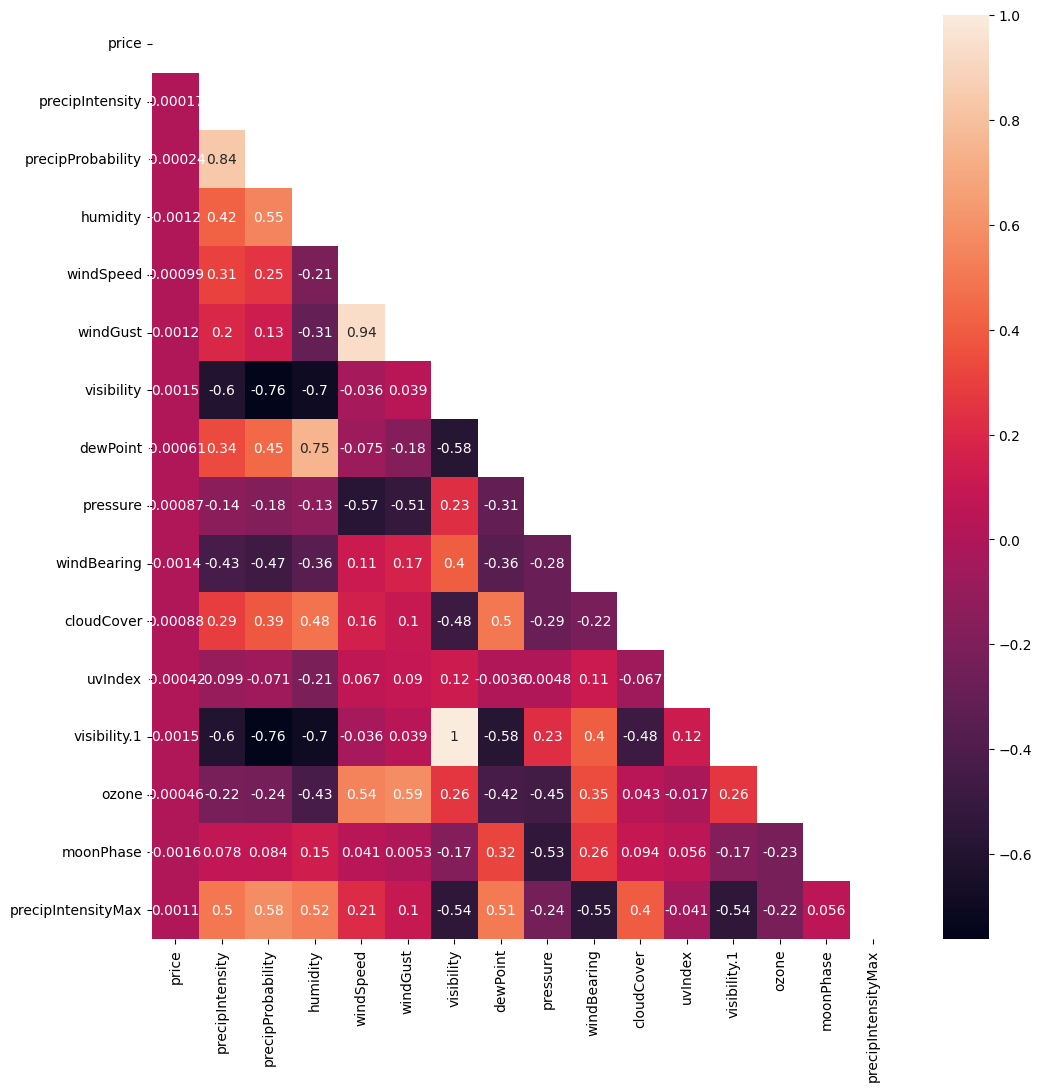

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_cli.corr(),annot=True, mask=np.triu(data_cli.corr()))

Terlihat bahwa beberapa korelasi sangat mendekati 0 bahwa artinya menunjukan bahwa tidak adanya korelasi sehingga akan dilakukan penghapusan kolom

In [ ]:
# drop data climate features
cli_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
df = df.drop(cli_col,axis=1)
df.head()

,index,hour,day,month,price,distance,surge_multiplier,temperature,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0,9,16,12,5.00,0.44,1.00,42.34,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,2,27,11,11.00,0.44,1.00,43.58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,1,28,11,7.00,0.44,1.00,38.33,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,4,30,11,26.00,0.44,1.00,34.38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,3,29,11,9.00,0.44,1.00,37.44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
 #membuat dataframe dengan variabel price dan source
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End']
df_src = df[src_col]
df_src.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.00,0,0,0,0,0,1,0,0,0,0,0,0
1,11.00,0,0,0,0,0,1,0,0,0,0,0,0
2,7.00,0,0,0,0,0,1,0,0,0,0,0,0
3,26.00,0,0,0,0,0,1,0,0,0,0,0,0
4,9.00,0,0,0,0,0,1,0,0,0,0,0,0


<Axes: >

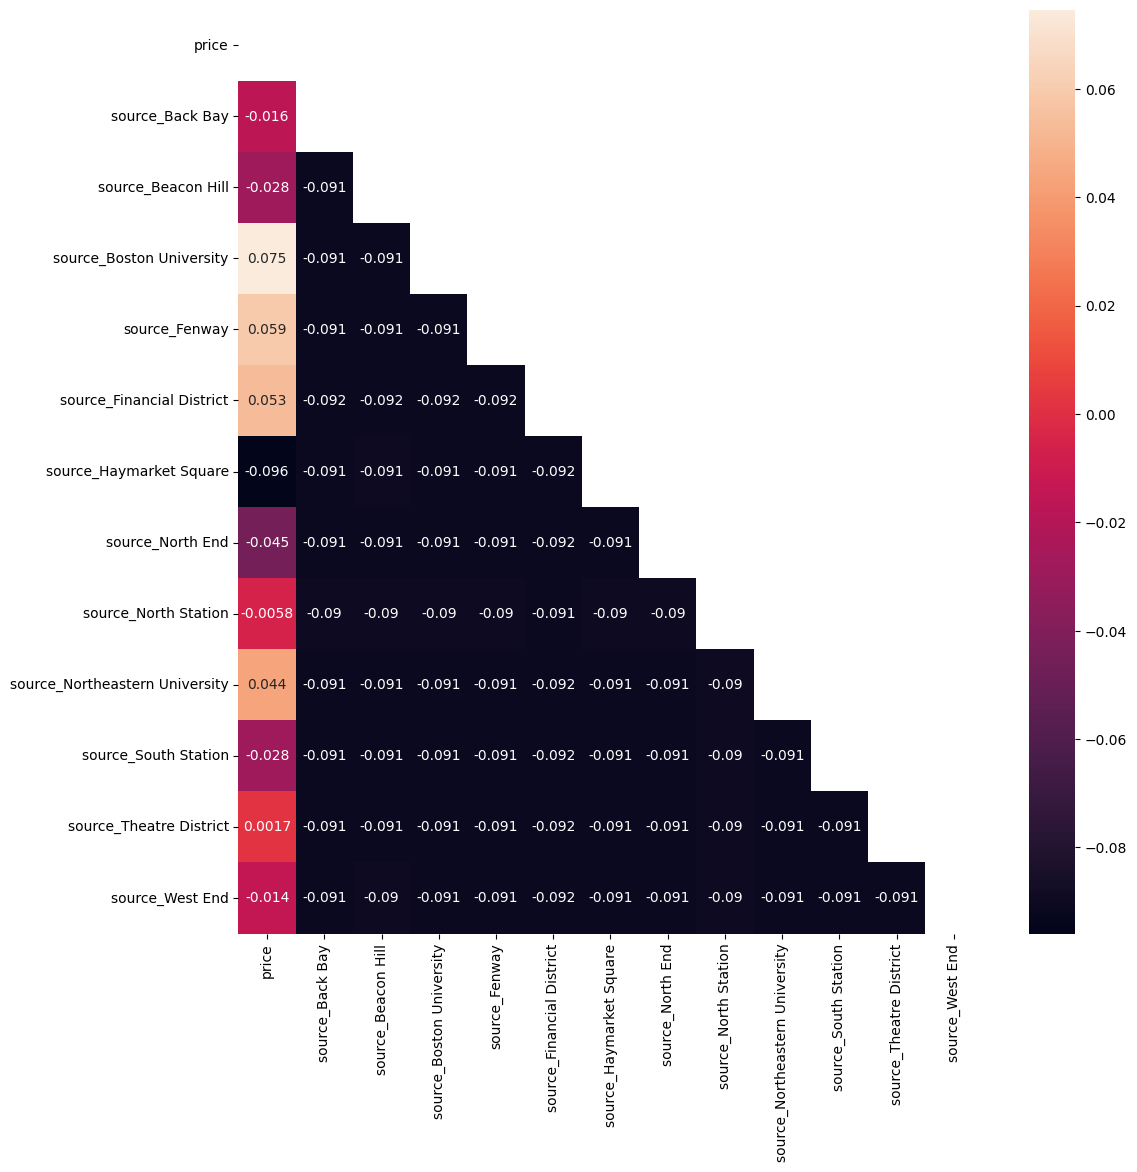

In [ ]:
# membuat plot heatmap untuk melihat korelasi pada data_src
plt.figure(figsize=(12,12))
sns.heatmap(df_src.corr(),annot=True, mask=np.triu(df_src.corr()))

Korelasi antar kolom price dengan source yaitu korelasi yang sangat kecil atau mendekati 0, maka itu kita akan drop semua kolom source

In [ ]:
sour_col = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End']

# drop source
df = df.drop(sour_col, axis=1)

In [ ]:
# membuat dataframe dengan variabel price dan destination
dest_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df_dst = df[dest_col]
df_dst.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.00,0,0,0,0,0,0,0,1,0,0,0,0
1,11.00,0,0,0,0,0,0,0,1,0,0,0,0
2,7.00,0,0,0,0,0,0,0,1,0,0,0,0
3,26.00,0,0,0,0,0,0,0,1,0,0,0,0
4,9.00,0,0,0,0,0,0,0,1,0,0,0,0


<Axes: >

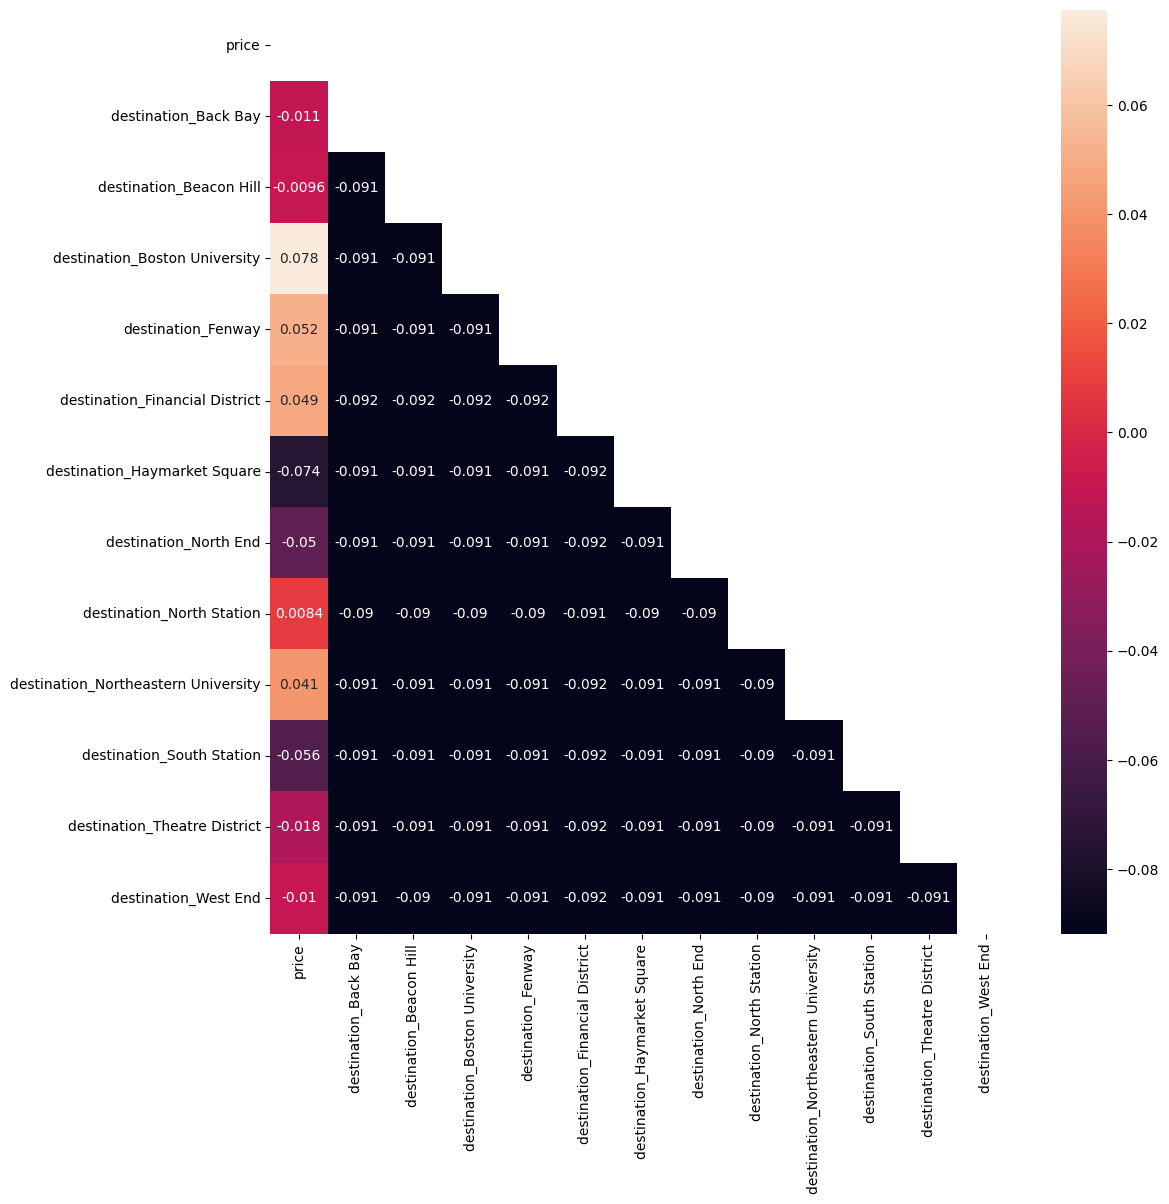

In [ ]:
# membuat plot heatmap untuk melihat korelasi pada data_dst
plt.figure(figsize=(12,12))
sns.heatmap(df_dst.corr(),annot=True, mask=np.triu(df_dst.corr()))

Terlihat bahwa korelasi-korelasi diatas memiliki korelasi yang mendekati nol, bahwa artinya korelasi yang sangat kecil dan tidak berpengaruh dalam target. sehingga kolom akan dihapus

In [ ]:
# drop destination column value tanpa ada price
dest_cols = ['destination_Back Bay','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df = df.drop(dest_cols,axis=1)

In [ ]:
# membuat dataframe dengan variabel price dan short summary
short_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
df_short = df[short_cols]
df_short.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.00,0,0,0,1,0,0,0,0,0
1,11.00,0,0,0,0,0,0,0,1,0
2,7.00,0,0,0,0,0,0,0,0,1
3,26.00,0,0,0,0,0,0,0,0,1
4,9.00,0,0,0,0,0,1,0,0,0


<Axes: >

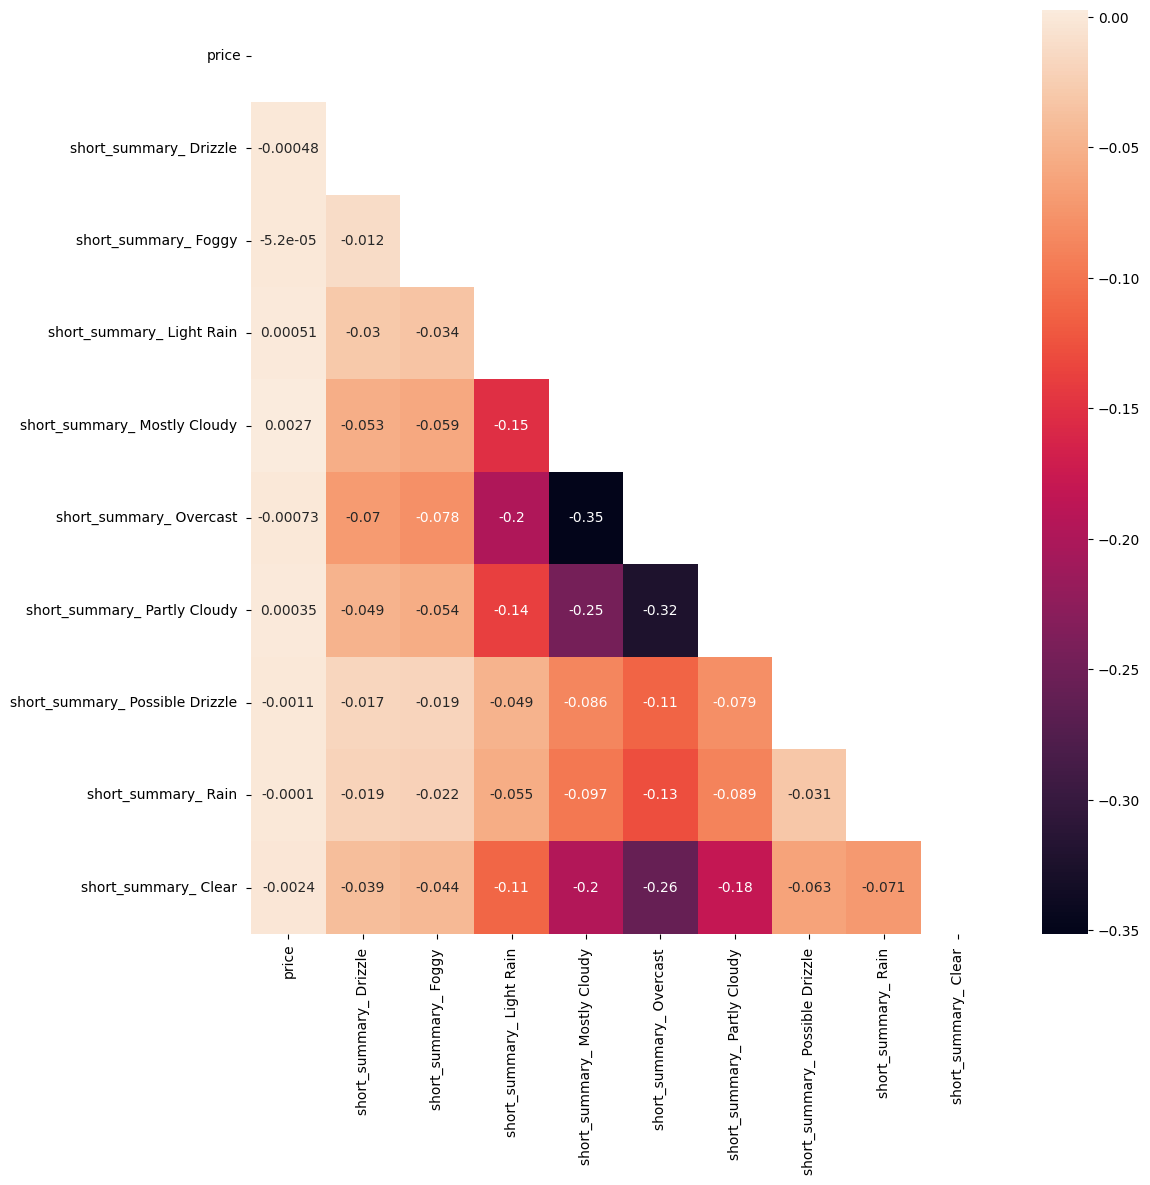

In [ ]:
#membuat plot heatmap untuk melihat korelasi pada df_short
plt.figure(figsize=(12,12))
sns.heatmap(df_short.corr(),annot=True, mask=np.triu(df_short.corr()))

Korelasi diatas memiiki beberapa korelasi yang mendekati 0, yaitu artinya korelasi yang sangat kecil sehingga tidak berpengaruh dalam target. maka kondisinya kolom akan dihapus

In [ ]:
# drop data column short summary
shortt_cols = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
df = df.drop(shortt_cols,axis=1)

In [ ]:
# membuat dataframe dengan variabel price dan product
prod_cols = ['price', 'product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e', 'product_id_6c84fd89-3f11-4782-9b50-97c468b19529', 'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546', 'product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969', 'product_id_997acbb5-e102-41e1-b155-9df7de0a73f2', 'product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d', 'product_id_lyft', 'product_id_lyft_line', 'product_id_lyft_lux', 'product_id_lyft_luxsuv', 'product_id_lyft_plus', 'product_id_lyft_premier']
df_prod = df[prod_cols]
df_prod.head()

,price,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,5.00,0,0,0,0,0,0,0,1,0,0,0,0
1,11.00,0,0,0,0,0,0,0,0,0,0,0,1
2,7.00,0,0,0,0,0,0,1,0,0,0,0,0
3,26.00,0,0,0,0,0,0,0,0,0,1,0,0
4,9.00,0,0,0,0,0,0,0,0,0,0,1,0


<Axes: >

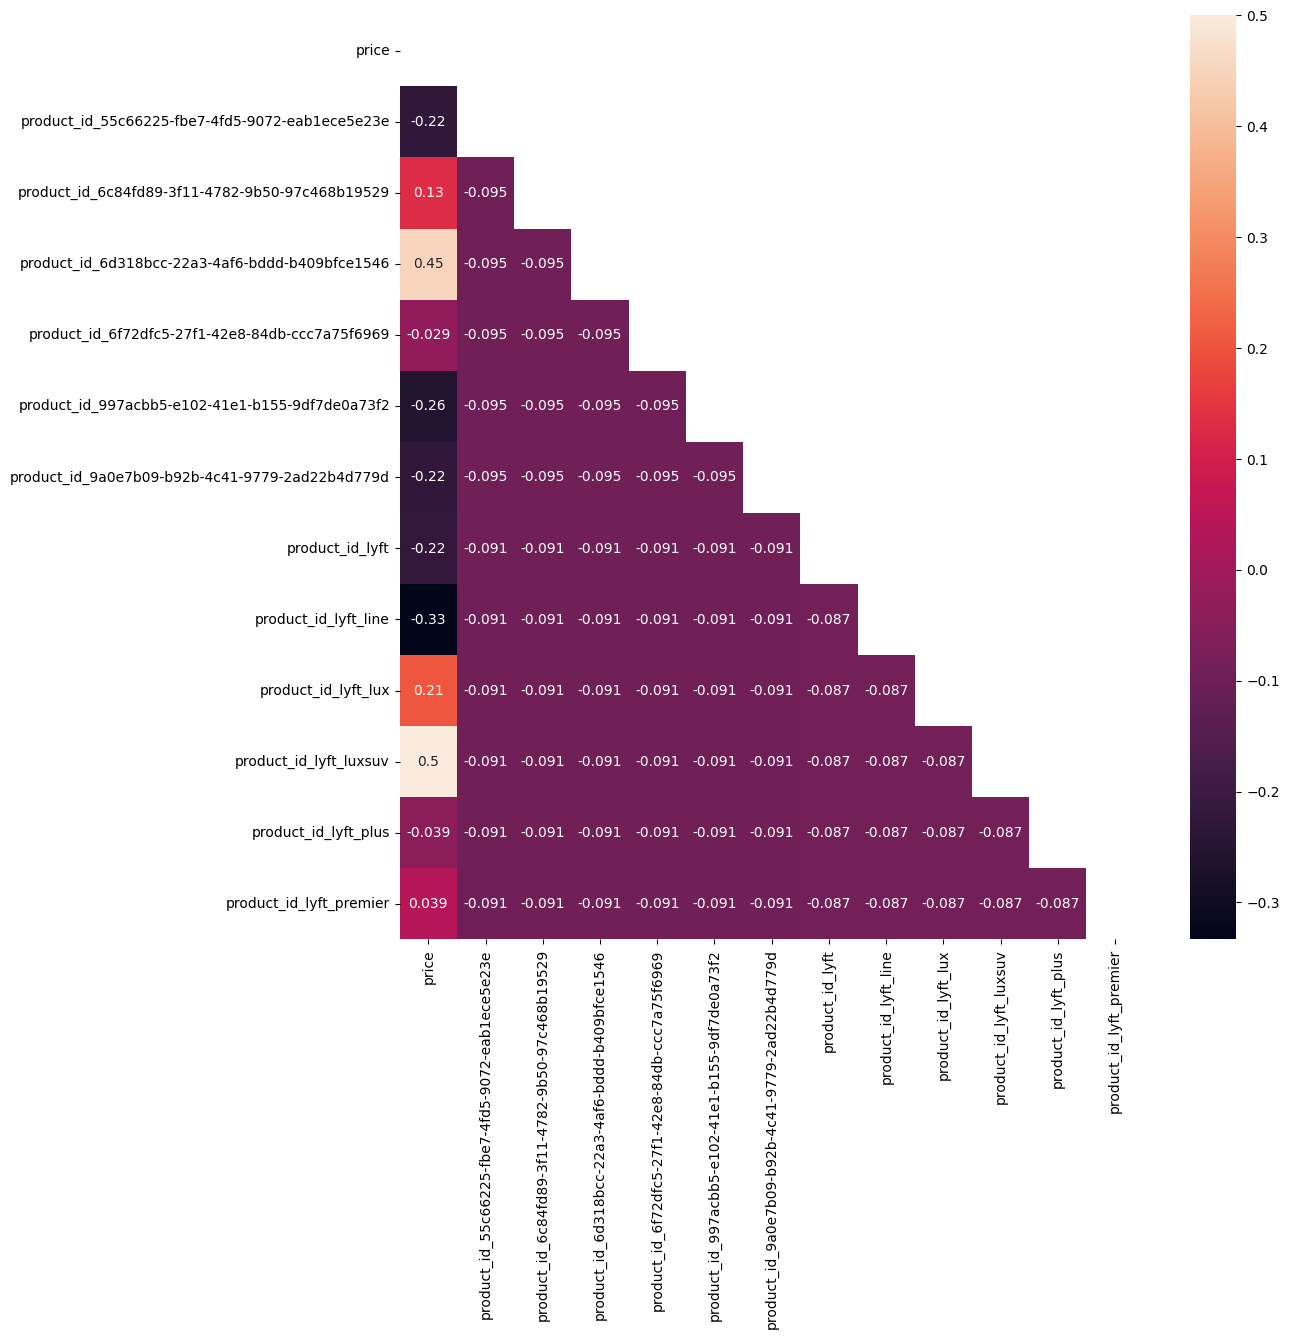

In [ ]:
# membuat plot heatmap untuk melihat korelasi pada df_prod
plt.figure(figsize=(12,12))
sns.heatmap(df_prod.corr(),annot=True, mask=np.triu(df_prod.corr()))

Korelasi diatas yaitu kolom antar price dengan product  memiiki beberapa korelasi yang mendekati 0, yaitu artinya korelasi yang sangat kecil. maka kondisinya kolom akan dihapus

In [ ]:
# drop data column product
prodd_cols = ['product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e', 'product_id_6c84fd89-3f11-4782-9b50-97c468b19529', 'product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546', 'product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969', 'product_id_997acbb5-e102-41e1-b155-9df7de0a73f2', 'product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d', 'product_id_lyft', 'product_id_lyft_line', 'product_id_lyft_lux', 'product_id_lyft_luxsuv', 'product_id_lyft_plus', 'product_id_lyft_premier']
df = df.drop(prodd_cols,axis=1)

In [ ]:
# membuat dataframe dengan variabel price dan name
name_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared',  'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
df_name = df[name_cols]
df_name.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.00,0,0,0,0,0,0,0,1,0,0,0,0
1,11.00,0,0,1,0,0,0,0,0,0,0,0,0
2,7.00,0,0,0,0,0,1,0,0,0,0,0,0
3,26.00,0,0,0,0,1,0,0,0,0,0,0,0
4,9.00,0,0,0,0,0,0,1,0,0,0,0,0


<Axes: >

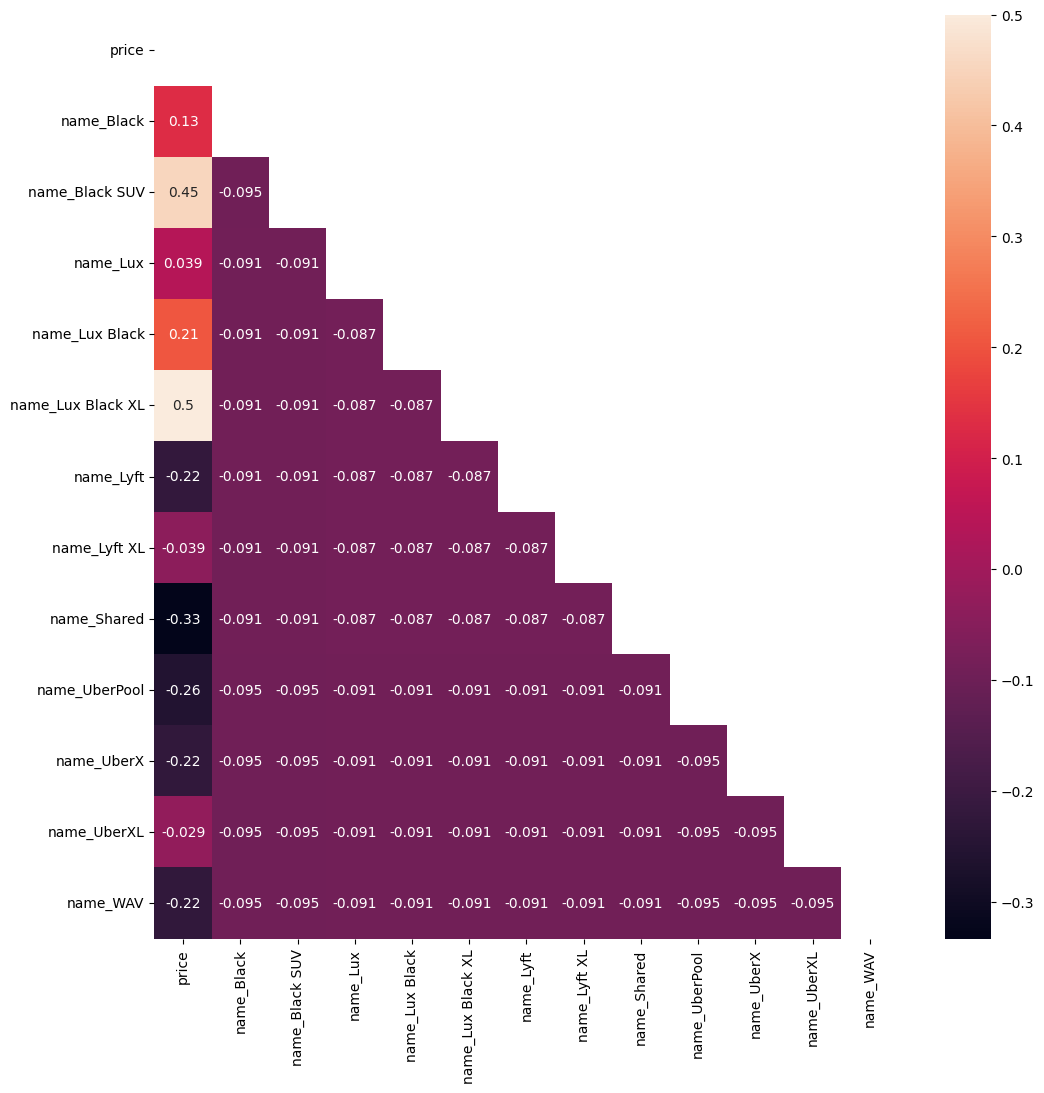

In [ ]:
# membuat plot heatmap untuk melihat korelasi pada data_name
plt.figure(figsize=(12,12))
sns.heatmap(df_name.corr(),annot=True, mask=np.triu(df_name.corr()))

Mempertahankan kolom karena beberapa memiliki korelasi

In [ ]:
# membuat dataframe dengan variabel price dan variabel lainnya yang tersisa
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
df_rem = df[rem_cols]
df_rem.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.00,9,16,12,0.44,1.00,1,0
1,11.00,2,27,11,0.44,1.00,1,0
2,7.00,1,28,11,0.44,1.00,1,0
3,26.00,4,30,11,0.44,1.00,1,0
4,9.00,3,29,11,0.44,1.00,1,0


<Axes: >

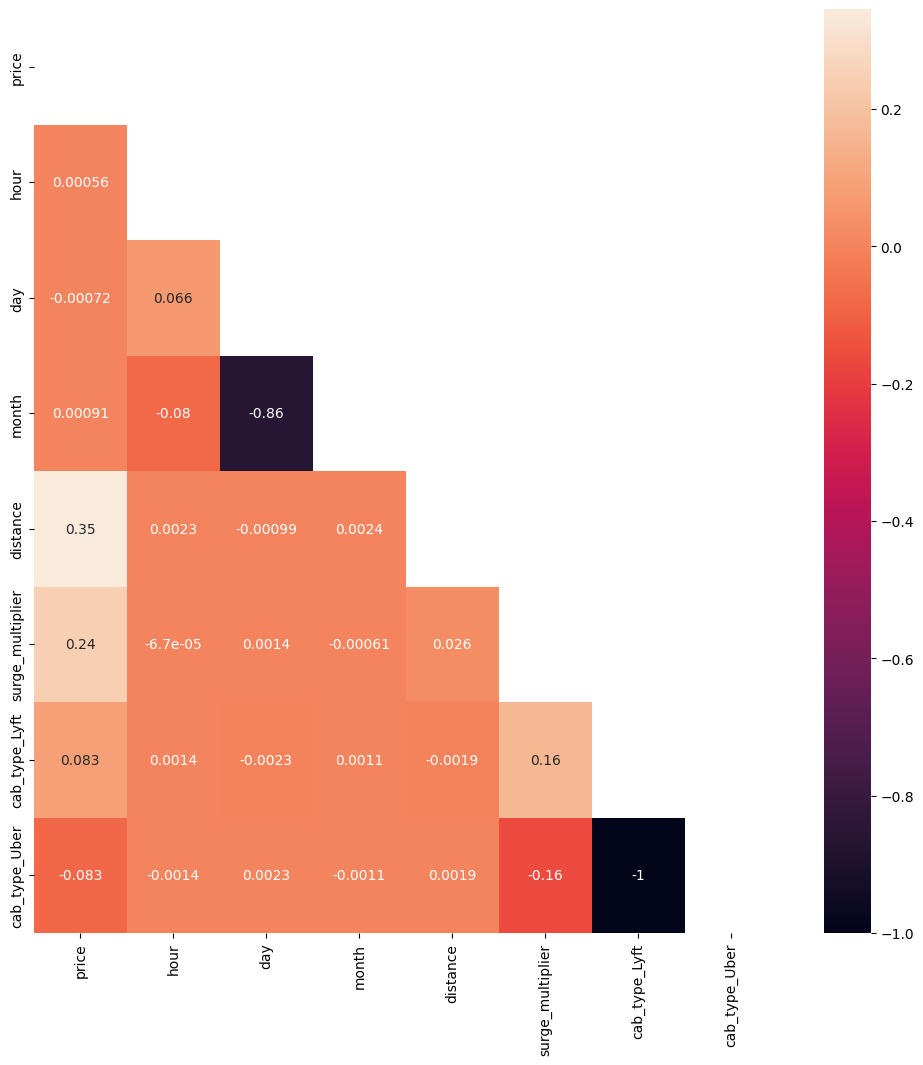

In [ ]:
# membuat plot heatmap untuk melihat korelasi pada data_rem
plt.figure(figsize=(12,12))
sns.heatmap(df_rem.corr(),annot=True, mask=np.triu(df_rem.corr()))

Terlihat bahwa korelasi dengan variabel price yaitu surge_multiplier dan distance dengan nilai korelasi 0.23 dan 0.34 , sedangkan variabel lainnya tidak memiliki korelasi atau memiliki negatif ataupun hampir 0 sehingga variabel lainnya dapat dihapus.

In [ ]:
df_new = df.drop(['month','day','hour','cab_type_Lyft','cab_type_Uber'],axis=1)
print(df.shape)
df_new.head()

(637976, 22)


,index,price,distance,surge_multiplier,temperature,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,5.00,0.44,1.00,42.34,0,0,0,0,0,0,0,1,0,0,0,0
1,1,11.00,0.44,1.00,43.58,0,0,1,0,0,0,0,0,0,0,0,0
2,2,7.00,0.44,1.00,38.33,0,0,0,0,0,1,0,0,0,0,0,0
3,3,26.00,0.44,1.00,34.38,0,0,0,0,1,0,0,0,0,0,0,0
4,4,9.00,0.44,1.00,37.44,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              637976 non-null  int64  
 1   hour               637976 non-null  int64  
 2   day                637976 non-null  int64  
 3   month              637976 non-null  int64  
 4   price              637976 non-null  float64
 5   distance           637976 non-null  float64
 6   surge_multiplier   637976 non-null  float64
 7   temperature        637976 non-null  float64
 8   cab_type_Lyft      637976 non-null  int64  
 9   cab_type_Uber      637976 non-null  int64  
 10  name_Black         637976 non-null  int64  
 11  name_Black SUV     637976 non-null  int64  
 12  name_Lux           637976 non-null  int64  
 13  name_Lux Black     637976 non-null  int64  
 14  name_Lux Black XL  637976 non-null  int64  
 15  name_Lyft          637976 non-null  int64  
 16  na

### **Normalization**

In [ ]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [ ]:
scaled_df.head()

,index,hour,day,month,price,distance,surge_multiplier,temperature,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-1.00,-0.25,-0.07,0.00,-0.63,-1.04,0.00,0.26,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,-1.00,-0.83,0.67,-1.00,-0.19,-1.04,0.00,0.43,1.00,-1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-1.00,-0.92,0.73,-1.00,-0.48,-1.04,0.00,-0.30,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-1.00,-0.67,0.87,-1.00,0.93,-1.04,0.00,-0.86,1.00,-1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-1.00,-0.75,0.80,-1.00,-0.33,-1.04,0.00,-0.43,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X = scaled_df.drop(columns='price')
y = scaled_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## **7. Pendefinisian Model**

Setelah melakukan berbagai tahapan, model yang akan digunakan pada project kali ini yaitu Linear Regression. Regresi linear adalah metode statistik yang digunakan untuk memodelkan hubungan linier antara satu atau lebih variabel independen (juga disebut prediktor atau fitur) dan variabel dependen (juga disebut respons). Tujuannya adalah untuk menemukan persamaan garis atau hiperplane yang paling baik memodelkan hubungan antara variabel independen dan variabel dependen.

In [ ]:
# Membuat model Linear Regression
lr = LinearRegression()

## **8. Pelatihan Model**

In [ ]:
# Melakukan pelatihan model
lr.fit(X_train, y_train)

LinearRegression()

## **9. Evaluasi Model**

In [ ]:
Ir = LinearRegression()
Ir.fit(X_train, y_train)
r_sq = Ir.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9274876027194537


Adjusted R-Squared pada data training dan testing sebesar 0.92 menandakan bahwa 92% variasi dalam nilai price dapat dijelaskan oleh variabel prediktor yang digunakan. Hasil ini menunjukkan kualitas yang sangat baik dalam tahap feature engineering yang telah dilakukan.

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

0.03502720327148782

MSE digunakan untuk mengevaluasi seberapa baik model regresi dapat memprediksi nilai numerik. Nilai ini memberikan gambaran tentang seberapa baik model kita dapat mengukur variabilitas dalam data dan seberapa dekat prediksinya dengan nilai sebenarnya. Semakin kecil nilai MSE, semakin baik kinerja model. Nilai MSE 0 berarti model sempurna, di mana prediksi model cocok dengan nilai sebenarnya.

 Pada data ini dapat dilihat bahwa nilai MSE ada pada 0.03, hal ini sangat baik karena nilai mendekati angka 0 mendekati sempurna

# **10. Model Inference**

In [ ]:
X_train.sample()

,index,hour,day,month,distance,surge_multiplier,temperature,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
291663,-0.09,-0.83,-0.13,0.00,-0.43,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [ ]:
# Konversi numpy array menjadi DataFrame
X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(y_train)

In [ ]:
# Ambil sampel 5 baris dari DataFrame X_train_df
df_inference = X_train_df.sample(5)

In [ ]:
X_train_df.sample(5)

,index,hour,day,month,distance,surge_multiplier,temperature,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
266251,-0.17,-0.50,-0.13,0.00,0.10,0.00,0.75,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
62916,-0.80,0.00,-0.20,0.00,-0.47,0.00,-1.76,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
330523,0.04,-1.00,-0.13,0.00,0.08,0.00,0.16,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
130850,-0.59,-0.17,0.60,-1.00,1.39,0.00,0.13,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
545147,0.71,-0.92,0.67,-1.00,-0.70,0.00,0.44,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# melakukan prediksi pada set pengujian
y_pred = Ir.predict(df_inference)

# menampilkan hasil prediksi
print("Hasil Prediksi data sample:")
print(y_pred)

Hasil Prediksi data sample:
[ 1.24941254 -0.52558136 -0.41587067 -0.35803986 -0.73047638]


Hasil prediksi dengan data sampel diatas menyatakan bahwa hasil prediksi tertinggi yaitu dengan nilai 1.25

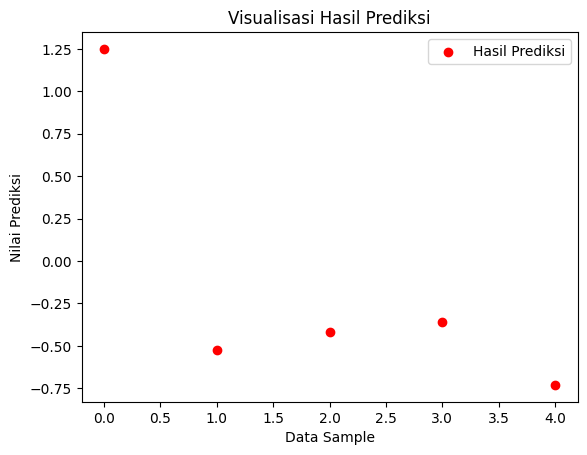

In [ ]:
# Membuat scatter plot
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Hasil Prediksi')
plt.xlabel('Data Sample')
plt.ylabel('Nilai Prediksi')
plt.title('Visualisasi Hasil Prediksi')
plt.legend()
plt.show()

Dari visualisasi hasil prediksi diatas terlihat bahwa prediksi dengan nilai 1.25 yang paling tinggi diantara yang lainnya

# **11. Pengambilan Kesimpulan**

## **Berdasarkan Analisis dan model regresi linear yang telah dilakukan didapatkan**
1. Order Taxi Uber dan Lyft paling banyak ada di jam malam yaitu jam 12 malam
2. Terdapat beberapa faktor yang mempengaruhi harga taksi yaitu jam, jarak tempuh, kendaraan, dan tipe kendaraan.
3. Nilai R2Squared sebesar 0.92 atau 92% menandakan bahwa 92% variasi dalam nilai price dapat dijelaskan oleh variabel prediktor yang digunakan.
4. Nilai MSE sebesar 0.03 yang mana nilai mendekati 0 yang berarti model mendekati sempurna, di mana prediksi model cocok dengan nilai sebenarnya.
5. Hasil prediksi dengan data sampel yang digunakan yaitu  dengan nilai 1.25 hasil prediksi tertinggi dan 0.36 dengan hasil prediksi



In [ ]:
df.columns

Index(['index', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'temperature', 'cab_type_Lyft', 'cab_type_Uber',
       'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

## **Dari regressi linear di daptkan juga persamaan sebagai berikut**

Y = [-1.89861848e-04  3.84967751e-05  1.40113977e-06  1.76207967e-04
  3.43640900e-01  1.35936600e+00  1.46786481e-04 -6.60125663e+11
 -6.99755113e+11 -5.74886756e+10 -5.74886756e+10 -9.71181253e+10
 -9.71181253e+10 -9.71181253e+10 -9.71181253e+10 -9.71181253e+10
 -9.71181253e+10 -5.74886756e+10 -5.74886756e+10 -5.74886756e+10
 -5.74886756e+10]

 y = Price

 X1 = 'index',

 X2 ='hour',

 X3 = 'day',

 X4 = 'month'

 X5 = 'distance',

 X6 = 'surge_multiplier'

 X7 = 'temperature'

 X8 ='cab_type_Lyft',

 X9 ='cab_type_Uber',

 X10 = 'name_Black',

 X11 ='name_Black SUV',

 X12 ='name_Lux',

 X13 ='name_Lux Black',

 X14 ='name_Lux Black XL',

 X15 ='name_Lyft'

 X16 ='name_Lyft XL'

 X17 ='name_Shared'

X18 ='name_UberPool'

X19 ='name_UberX'

X20 ='name_UberXL'

X21 ='name_WAV'


In [ ]:
print('Intercept:',lr.intercept_)
print('Slope:',lr.coef_)

Intercept: 57488675610.6318
Slope: [-1.89861848e-04  3.84967751e-05  1.40113977e-06  1.76207967e-04
  3.43640900e-01  1.35936600e+00  1.46786481e-04 -6.60125663e+11
 -6.99755113e+11 -5.74886756e+10 -5.74886756e+10 -9.71181253e+10
 -9.71181253e+10 -9.71181253e+10 -9.71181253e+10 -9.71181253e+10
 -9.71181253e+10 -5.74886756e+10 -5.74886756e+10 -5.74886756e+10
 -5.74886756e+10]
